## Understanding  Gramian Angular Field for converting timeseries into an image


In [4]:
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

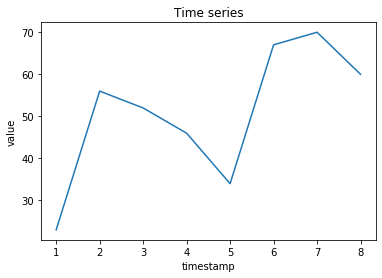

In [37]:
X = [[1,2,3,4,5,6,7,8],[23,56,52,46,34,67,70,60]]
plt.plot(X[0],X[1])
plt.title('Time series')
plt.xlabel('timestamp')
plt.ylabel('value')
plt.show()

# Step-1: Piecewise aggregation approximation 

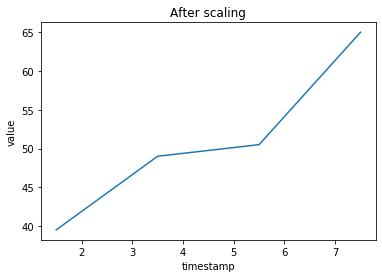

In [43]:
# Piecewise aggregation approximation
transformer = PiecewiseAggregateApproximation(window_size=2)
paa_X = transformer.transform(X)

plt.plot(paa_X[0,:],paa_X[1,:])
plt.title('After scaling')
plt.xlabel('timestamp')
plt.ylabel('value')
plt.show()

# Step-2: Scaling

In [44]:
# Scaling in interval [0,1]
scaler = MinMaxScaler()
scaled_X = scaler.transform(result)

scaled_X

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.37254902, 0.43137255, 1.        ]])

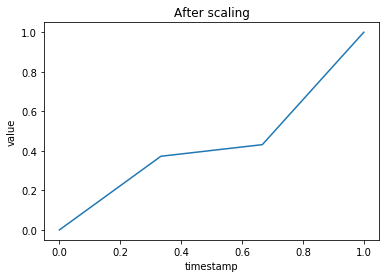

In [45]:
plt.plot(scaled_X[0,:],scaled_X[1,:])
plt.title('After scaling')
plt.xlabel('timestamp')
plt.ylabel('value')
plt.show()

# Step-3: Generating polar coordinates 

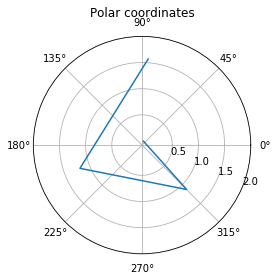

In [46]:
arccos_X = np.arccos(scaled_X[1,:])
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(result[0,:], arccos_X)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Polar coordinates", va='bottom')
plt.show()

# Step-4: Generating Garmian Summation Angular Fields

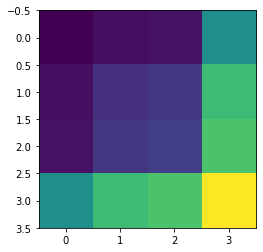

In [32]:
field = [a+b for a in arccos_X for b in arccos_X]
gram = np.cos(field).reshape(-1,4)
plt.imshow(gram)